In [1]:
import numpy as np
import sklearn.metrics
import sklearn.linear_model
import sklearn.ensemble
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')

In [2]:
df_train = pd.read_csv('train.csv', index_col=False)
df_test = pd.read_csv('test.csv', index_col=False)
df_train[:5]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Amount,Class
0,0.831314,-0.432472,-0.049039,0.901758,-0.487028,0.343540,-0.560537,0.205336,0.782904,0.220247,0.738105,1.133737,0.293355,-0.047399,0.220868,0
1,0.361998,-1.454860,-0.662910,0.770255,-0.965559,-0.298392,0.284656,-0.229829,0.784164,-0.213548,-0.653015,0.611788,0.889271,-0.026870,2.317812,0
2,0.636669,0.167194,0.047262,0.805431,-0.216461,-0.832227,0.211087,-0.149383,0.130334,0.068404,-0.679350,-0.769682,-1.879475,0.874865,-0.315146,0
3,0.953572,-0.081125,-1.585880,0.790444,0.661770,-0.584282,0.756169,-0.372009,-0.021283,0.292584,-1.691218,-0.416605,-0.408600,0.919810,0.220868,0
4,-1.881063,1.933660,-0.934299,-0.027952,-1.532906,-0.533383,-1.347156,2.364144,-0.488517,-0.149267,0.891399,1.105027,-0.896903,1.668861,-0.268631,0


In [3]:
print('0: %d\n1: %d' % tuple(df_train['Class'].value_counts()))
print('total: %d' % len(df_train))

0: 227450
1: 395
total: 227845


In [4]:
df_features = df_train.drop(['Amount', 'Class'], axis=1)
df_features[:5]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,0.831314,-0.432472,-0.049039,0.901758,-0.487028,0.343540,-0.560537,0.205336,0.782904,0.220247,0.738105,1.133737,0.293355,-0.047399
1,0.361998,-1.454860,-0.662910,0.770255,-0.965559,-0.298392,0.284656,-0.229829,0.784164,-0.213548,-0.653015,0.611788,0.889271,-0.026870
2,0.636669,0.167194,0.047262,0.805431,-0.216461,-0.832227,0.211087,-0.149383,0.130334,0.068404,-0.679350,-0.769682,-1.879475,0.874865
3,0.953572,-0.081125,-1.585880,0.790444,0.661770,-0.584282,0.756169,-0.372009,-0.021283,0.292584,-1.691218,-0.416605,-0.408600,0.919810
4,-1.881063,1.933660,-0.934299,-0.027952,-1.532906,-0.533383,-1.347156,2.364144,-0.488517,-0.149267,0.891399,1.105027,-0.896903,1.668861


# Exercise 1. Removal of outliers

In [5]:
def mahalanobis_distance(X, mean, pre):
    X_ = X - mean.reshape(1, -1)
    return np.sqrt(np.sum(X_.dot(pre) * X_, axis=1))

In [6]:
mean = df_features.mean().values
cov = df_features.cov().values
pre = np.linalg.inv(cov)

distances = mahalanobis_distance(df_features.values, mean, pre)
mask = [d > 50 for d in distances]
df_train['Outlier'] = pd.Series(mask, index=df_train.index)
df_no_outlier = df_train[np.logical_not(mask)]

df_no_outlier[:5]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Amount,Class,Outlier
0,0.831314,-0.432472,-0.049039,0.901758,-0.487028,0.343540,-0.560537,0.205336,0.782904,0.220247,0.738105,1.133737,0.293355,-0.047399,0.220868,0,False
1,0.361998,-1.454860,-0.662910,0.770255,-0.965559,-0.298392,0.284656,-0.229829,0.784164,-0.213548,-0.653015,0.611788,0.889271,-0.026870,2.317812,0,False
2,0.636669,0.167194,0.047262,0.805431,-0.216461,-0.832227,0.211087,-0.149383,0.130334,0.068404,-0.679350,-0.769682,-1.879475,0.874865,-0.315146,0,False
3,0.953572,-0.081125,-1.585880,0.790444,0.661770,-0.584282,0.756169,-0.372009,-0.021283,0.292584,-1.691218,-0.416605,-0.408600,0.919810,0.220868,0,False
4,-1.881063,1.933660,-0.934299,-0.027952,-1.532906,-0.533383,-1.347156,2.364144,-0.488517,-0.149267,0.891399,1.105027,-0.896903,1.668861,-0.268631,0,False


In [7]:
print('0: %d\n1: %d' % tuple(df_no_outlier['Class'].value_counts()))
print('total: %d' % len(df_no_outlier.index))
print('remaining(%%): %f' % (len(df_no_outlier.index) / len(df_train.index)))

0: 227444
1: 392
total: 227836
remaining(%): 0.999960


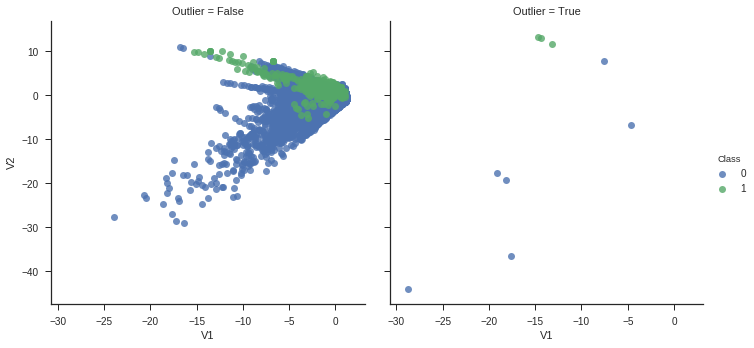

In [8]:
sns.lmplot('V1', 'V2', data=df_train, hue='Class', fit_reg=False, col='Outlier')

# Exercise 2. Classification without downsampling

In [9]:
X_train = df_no_outlier.drop(['Amount', 'Class', 'Outlier'], axis=1).values
y_train = df_no_outlier['Class'].values

X_test = df_test.drop(['Amount', 'Class'], axis=1).values
y_test = df_test['Class'].values

In [10]:
logistic = sklearn.linear_model.LogisticRegression()
fit = logistic.fit(X_train, y_train)
confusion_train = sklearn.metrics.confusion_matrix(y_train, logistic.predict(X_train))
confusion_test = sklearn.metrics.confusion_matrix(y_test, logistic.predict(X_test))

np.set_printoptions(precision=2)
print('train confusion:')
print(confusion_train)
fpr, tpr = sklearn.metrics.roc_curve(y_train, logistic.predict(X_train))[:2]
print('train auc: %f' % sklearn.metrics.auc(fpr, tpr))

print('test confusion:')
print(confusion_test)
fpr, tpr = sklearn.metrics.roc_curve(y_test, logistic.predict(X_test))[:2]
print('test auc: %f' % sklearn.metrics.auc(fpr, tpr))

train confusion:
[[227407     37]
 [   155    237]]
train auc: 0.802215
test confusion:
[[56854    11]
 [   43    54]]
test auc: 0.778254


# Classification with downsampling

In [15]:
df_positive = df_no_outlier[df_no_outlier['Class'] == 1]
df_negative = df_no_outlier[df_no_outlier['Class'] == 0]
df_negative_sampled = df_negative.sample(n=len(df_positive.index), random_state=0)
df_sampled = pd.concat([df_positive, df_negative_sampled])
X_train = df_sampled.drop(['Amount', 'Class', 'Outlier'], axis=1).values
y_train = df_sampled['Class'].values

logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(X_train, y_train)

np.set_printoptions(precision=2)
print('train confusion:')
print(sklearn.metrics.confusion_matrix(y_train, logistic.predict(X_train)))
fpr, tpr = sklearn.metrics.roc_curve(y_train, logistic.predict(X_train))[:2]
print('train auc: %f' % sklearn.metrics.auc(fpr, tpr))

print('test confusion:')
print(sklearn.metrics.confusion_matrix(y_test, logistic.predict(X_test)))
fpr, tpr = sklearn.metrics.roc_curve(y_test, logistic.predict(X_test))[:2]
print('test auc: %f' % sklearn.metrics.auc(fpr, tpr))

train confusion:
[[385   7]
 [ 35 357]]
train auc: 0.946429
test confusion:
[[55540  1325]
 [   11    86]]
test auc: 0.931649


# Exercise 3. Classification with downsampling + bagging

In [12]:
df_positive = df_no_outlier[df_no_outlier['Class'] == 1]
df_negative = df_no_outlier[df_no_outlier['Class'] == 0]
print('%d records are resampled to %d records' % (len(df_negative.index), len(df_positive.index)))

classifiers = []
for i in range(10):
    df_negative_sampled = df_negative.sample(n=len(df_positive.index), random_state=i)
    df_sampled = pd.concat([df_positive, df_negative_sampled])
    X_train = df_sampled.drop(['Amount', 'Class', 'Outlier'], axis=1).values
    y_train = df_sampled['Class'].values
    logistic = sklearn.linear_model.LogisticRegression()
    logistic.fit(X_train, y_train)
    classifiers += [logistic]

227444 records are resampled to 392 records


In [13]:
ensemble = sklearn.ensemble.VotingClassifier(estimators=[('lr', classifier) for classifier in classifiers], voting='hard')
ensemble.fit(X_train, y_train)

np.set_printoptions(precision=2)
print('train confusion:')
print(sklearn.metrics.confusion_matrix(y_train, ensemble.predict(X_train)))
fpr, tpr = sklearn.metrics.roc_curve(y_train, ensemble.predict(X_train))[:2]
print('train auc: %f' % sklearn.metrics.auc(fpr, tpr))

print('test confusion:')
print(sklearn.metrics.confusion_matrix(y_test, ensemble.predict(X_test)))
fpr, tpr = sklearn.metrics.roc_curve(y_test, ensemble.predict(X_test))[:2]
print('test auc: %f' % sklearn.metrics.auc(fpr, tpr))

train confusion:
[[387   5]
 [ 30 362]]
train auc: 0.955357
test confusion:
[[54770  2095]
 [    9    88]]
test auc: 0.935187


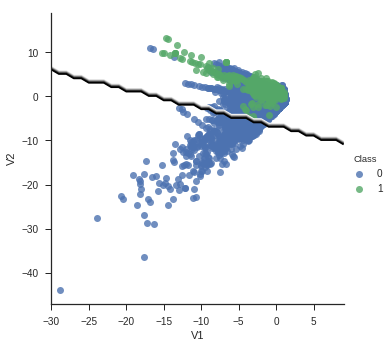

In [16]:
X, Y = np.meshgrid(np.arange(-30, 10, dtype=float), np.arange(-40, 20, dtype=float))
R = [np.zeros_like(X) for _ in range(12)] + df_no_outlier.mean().values[2:14].reshape(-1, 1, 1)
Z = ensemble.predict(np.transpose(np.array([X, Y] + list(R)).reshape(14, 2400))).reshape(60, 40)
sns.lmplot('V1', 'V2', data=df_train, hue='Class', fit_reg=False)
plt.contour(X, Y, Z)